# CAPSTONE PROJECT BENGKEL KODING DATA SCIENCE
## Dataset : Obesitas

## Nama : Firman Naufal Aryaputra
## NIM : A11.2022.14181
## Kelas : DS01


# 1.Import Library

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [28]:
# Mengatur gaya untuk visualisasi
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Analisis Data Eksploratori (EDA)

### 1.1 Memuat Data dan Menampilkan Informasi Dasar

In [30]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/ObesityDataSet.csv')
print("Menampilkan 5 data dari dataset")
df.head(5)

Menampilkan 5 data dari dataset


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [49]:
# Mendapatkan informasi tentang dataset
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                         

In [32]:
# Mendapatkan ringkasan statistik
print("\nRingkasan Statistik:")
df.describe()


Ringkasan Statistik:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [33]:
# Memeriksa bentuk dataset
print(f"\nBentuk Dataset: {df.shape}")


Bentuk Dataset: (2111, 17)


In [34]:
# Memeriksa nama kolom
print("\nNama Kolom:")
print(df.columns.tolist())


Nama Kolom:
['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS', 'NObeyesdad']


### 1.2 Periksa Nilai yang Hilang, Data Duplikat, dan Nilai Unik

In [35]:
# Memeriksa nilai yang hilang
print("\nJumlah Nilai yang Hilang:")
print(df.isnull().sum())


Jumlah Nilai yang Hilang:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [36]:
# Memeriksa baris duplikat
duplicates = df.duplicated().sum()
print(f"\nJumlah baris duplikat: {duplicates}")


Jumlah baris duplikat: 18


In [37]:
# Memeriksa nilai unik untuk setiap kolom
print("\nNilai Unik untuk Setiap Kolom:")
for col in df.columns:
    unique_values = df[col].nunique()
    print(f"{col}: {unique_values} nilai unik")


Nilai Unik untuk Setiap Kolom:
Age: 1394 nilai unik
Gender: 3 nilai unik
Height: 1562 nilai unik
Weight: 1518 nilai unik
CALC: 5 nilai unik
FAVC: 3 nilai unik
FCVC: 808 nilai unik
NCP: 637 nilai unik
SCC: 3 nilai unik
SMOKE: 3 nilai unik
CH2O: 1263 nilai unik
family_history_with_overweight: 3 nilai unik
FAF: 1186 nilai unik
TUE: 1130 nilai unik
CAEC: 5 nilai unik
MTRANS: 6 nilai unik
NObeyesdad: 7 nilai unik


### 1.3 Mengeksplorasi Variabel Target

In [38]:
# Mendapatkan jumlah nilai untuk variabel target
print("\nDistribusi Variabel Target (NObeyesdad):")
target_counts = df['NObeyesdad'].value_counts()
print(target_counts)


Distribusi Variabel Target (NObeyesdad):
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


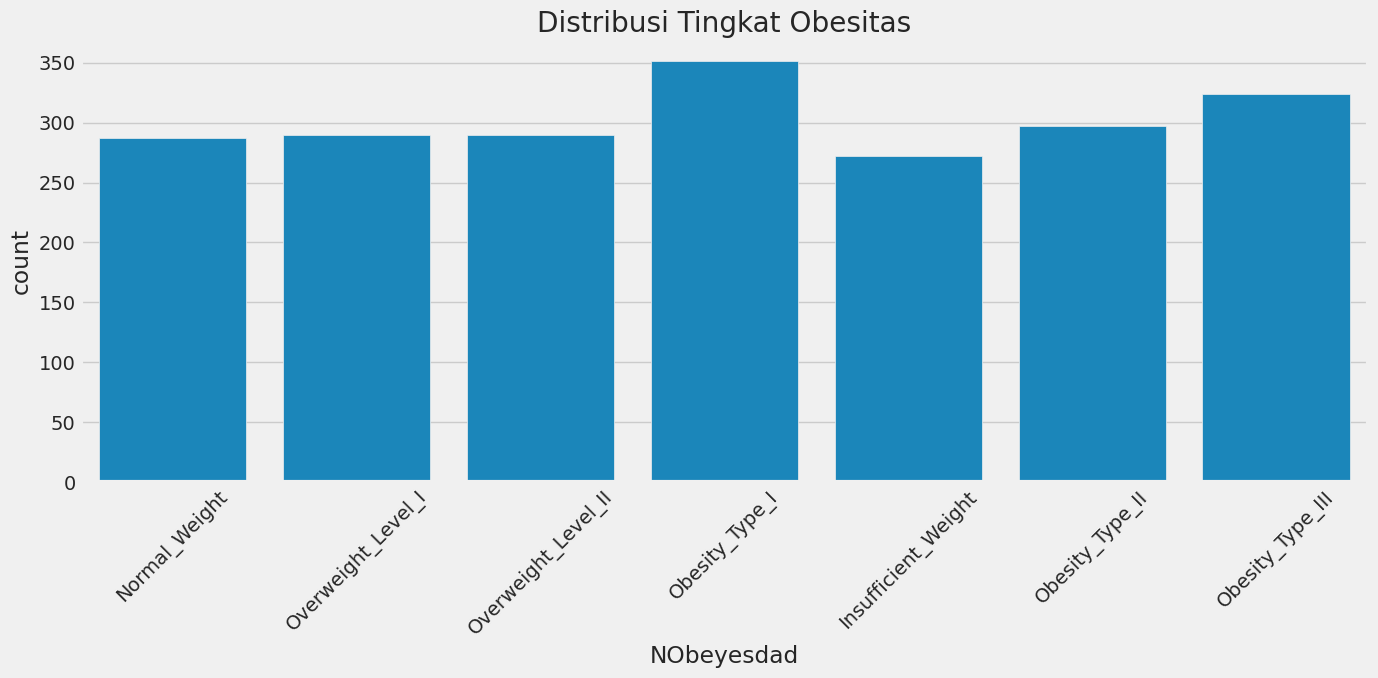

In [39]:
# Memvisualisasikan distribusi variabel target
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='NObeyesdad')
plt.title('Distribusi Tingkat Obesitas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
# Memeriksa apakah variabel target seimbang
print("\nPersentase Distribusi Kelas:")
class_distribution = (df['NObeyesdad'].value_counts() / len(df)) * 100
print(class_distribution)


Persentase Distribusi Kelas:
NObeyesdad
Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: count, dtype: float64


### 1.4 Mengeksplorasi Fitur Kategorikal

In [41]:
# Mengidentifikasi kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('NObeyesdad')  # Menghapus variabel target

In [42]:
print("\nFitur Kategorikal:")
print(categorical_cols)


Fitur Kategorikal:
['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS']
